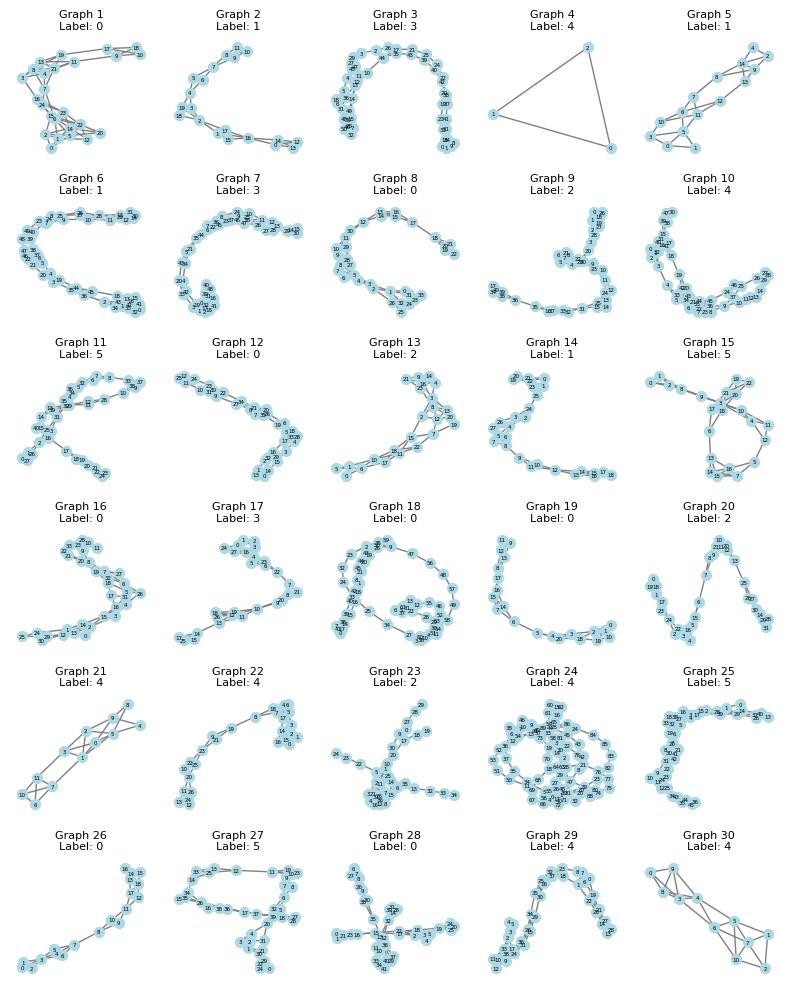

In [6]:
from torch_geometric.datasets import TUDataset
from matplotlib import pyplot as plt
import networkx as nx

# 加载ENZYMES数据集
dataset = TUDataset(
    root='./data/', 
    name='ENZYMES'
)
dataset = dataset.shuffle()

# 设置绘图参数
plt.rcParams['figure.dpi'] = 300
plt.style.use('default')

# 创建一个大的画布来展示30个图（6行5列布局）
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(8, 10))
axes = axes.flatten()  # 将2D数组转换为1D，便于循环索引

# 绘制前30个图
for i in range(30):
    data = dataset[i]
    graph = nx.Graph()
    
    # 添加边
    edge_index = data.edge_index
    source = edge_index[0]
    target = edge_index[1]
    for src, tge in zip(source, target):
        graph.add_edge(src.item(), tge.item())
    
    # 绘制图形
    nx.draw_networkx(
        G=graph, 
        ax=axes[i], 
        font_size=4, 
        node_size=50,
        node_color='lightblue',
        edge_color='gray'
    )
    
    # 添加标签（ENZYMES数据集的标签表示酶的功能类别，共6类）
    axes[i].set_title(f'Graph {i+1}\nLabel: {data.y.item()}', fontsize=8)
    axes[i].axis('off')  # 关闭坐标轴

plt.tight_layout()  # 调整布局，避免重叠
plt.show()